In [1]:
%%latex

echo "# CellLines" >> README.md
git init
git add README.md
git commit -m "first commit"
git remote add origin https://github.com/jesnyder/CellLines.git
git push -u origin master


<IPython.core.display.Latex object>

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

def csvread(n):
    a = pd.read_csv(n) # Pandas read csv into DataFrame
    a = np.array(a) #convert to NumPy array
    return(a)

CDC_BC_DC ='https://raw.githubusercontent.com/jesnyder/CellLines/4361c8066ca98d62644a8341ce74c3cc276d7eae/CDC_BC_IC.csv';
CDC_BC_IC = 'https://raw.githubusercontent.com/jesnyder/CellLines/master/CDC_BC_IC.csv';
Pat_BC ='https://raw.githubusercontent.com/jesnyder/CellLines/master/PatCount_BC.csv';
Pub_BC ='https://raw.githubusercontent.com/jesnyder/CellLines/master/PubCount_BC.csv';

CDC_BC_DC = csvread(CDC_BC_DC); 
CDC_BC_IC = csvread(CDC_BC_IC); 
Pat_BC = csvread(Pat_BC); 
Pub_BC = csvread(Pub_BC); 



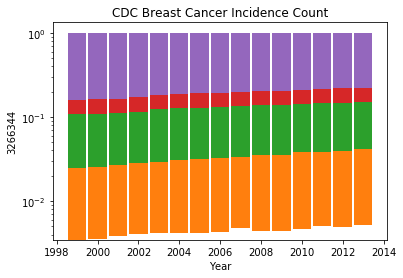

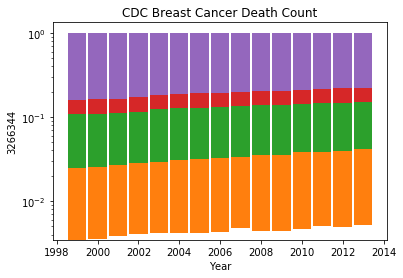

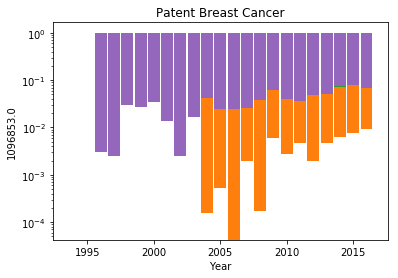

In [8]:
def stackedbarperc(A,t):
    x = A[:,0]; i=1; width = 0.9; j = []; k=0; 
    
    while(k<len(x)):
        a = np.sum(A[k,1:-1])
        j.append(a) 
        k=k+1;
               
    y = A[:,i]/j; p1 = plt.bar(x, y, width, yerr=1); z = y; i=i+1; 
    y = A[:,i]/j; p2 = plt.bar(x, y, width, bottom=z); z = z+y; i=i+1; 
    y = A[:,i]/j; p3 = plt.bar(x, y, width, bottom=z); z = z+y; i=i+1; 
    y = A[:,i]/j; p4 = plt.bar(x, y, width, bottom=z); z = z+y; i=i+1; 
    y = A[:,i]/j; p5 = plt.bar(x, y, width, bottom=z); z = z+y;
   
    fig = plt.gcf()
    plt.xlabel('Year')
    plt.ylabel(np.sum(j))
    plt.yscale('log')
    plt.title(t)
    plt.legend()
    plt.gcf()
    t = 'Fig_'+t +'.jpg'
    plt.savefig(t)
    plt.show()
    
      
stackedbarperc(CDC_BC_IC,'CDC Breast Cancer Incidence Count')
stackedbarperc(CDC_BC_DC,'CDC Breast Cancer Death Count')
stackedbarperc(Pat_BC,'Patent Breast Cancer')



[0.19999209809682916]
[0.19999209809682916, 0.25272307461515642]
[0.19999209809682916, 0.25272307461515642, 0.15445713866367372]
[0.19999209809682916, 0.25272307461515642, 0.15445713866367372, 0.1942292643016813]
[0.19999209809682916, 0.25272307461515642, 0.15445713866367372, 0.1942292643016813, 0.03917742750101294]
[1.0]
[1.0, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, nan]
[1.0, 1.0, 1.0, nan, 0.04967872532458717]


/Users/jessicasnyder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/Users/jessicasnyder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


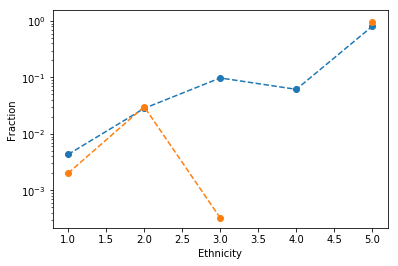

In [12]:
def average(A,t):
    x = A[:,0]; width = 0.35; j = []; k=0; 
    
    while(k<len(x)):
        a = np.sum(A[k,1:-1])
        j.append(a) 
        k=k+1;
    
    i=1; k=[]; l=[]; m=[]; 
    while(i<6):
        y = A[:,i]/j; 
        k.append(np.mean(y))
        l.append(1-np.min(y)/np.mean(y))
        print(l)
        m.append(np.max(y)/np.mean(y)-1)
        i=i+1
    
    r = list(range(1,len(k)+1)); 
    plt.errorbar(r, k, yerr=[l, l], fmt='--o')
    plt.yscale('log')
    plt.xlabel('Ethnicity')
    plt.ylabel('Fraction')
    

average(CDC_BC_IC,'CDC Breast Cancer Incidence Count')
average(Pat_BC,'Patent Breast Cancer')



